# Problem statement 
#### Analyse the Vehicle market in India using Segmentation analysis and come up with a  feasible strategy to enter the market, targeting the segments where there can be possible profit by offering Vehicle booking service.


In [1]:
# pip install plotly

In [2]:
#Import lib/tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Importing dataset
df = pd.read_csv("Dataset/indian-auto.csv")
df.head()

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


In [4]:
df = df.drop("Unnamed: 0", axis = 1)

In [5]:
df.head()

,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


### Exploring data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Manufacturer       5975 non-null   object 
 2   Location           5975 non-null   object 
 3   Year               5975 non-null   int64  
 4   Kilometers_Driven  5975 non-null   int64  
 5   Fuel_Type          5975 non-null   object 
 6   Transmission       5975 non-null   object 
 7   Owner_Type         5975 non-null   object 
 8   Engine CC          5975 non-null   int64  
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   int64  
 11  Mileage Km/L       5975 non-null   float64
 12  Price              5975 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 607.0+ KB


In [7]:
df.describe()

,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,1621.606695,112.599819,5.278828,18.179408,9.501647
std,3.247238,9.155851e+04,601.036987,53.659495,0.808959,4.521801,11.205736
min,1998.000000,1.710000e+02,624.000000,34.200000,0.000000,0.000000,0.440000
25%,2012.000000,3.390800e+04,1198.000000,74.000000,5.000000,15.200000,3.500000
50%,2014.000000,5.300000e+04,1493.000000,92.700000,5.000000,18.160000,5.650000
75%,2016.000000,7.300000e+04,1984.000000,138.100000,5.000000,21.100000,9.950000
max,2019.000000,6.500000e+06,5998.000000,560.000000,10.000000,33.540000,160.000000


In [8]:
df_unique = df["Name"].unique()

In [9]:
len(df_unique)

1855

In [10]:
df.head()

,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


In [11]:
len(df["Manufacturer"].unique())

31

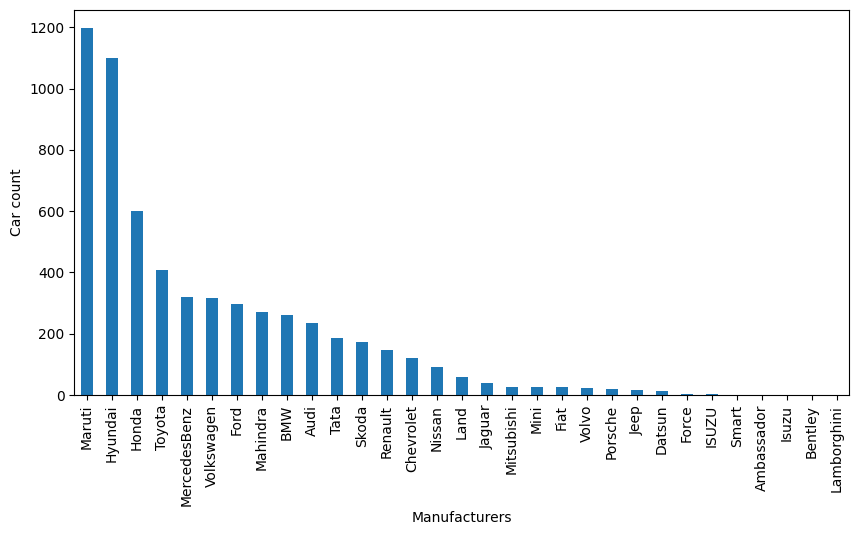

In [12]:
df["Manufacturer"].value_counts().plot(kind="bar",figsize=(10,5))
plt.ylabel("Car count")
plt.xlabel("Manufacturers")
plt.show()

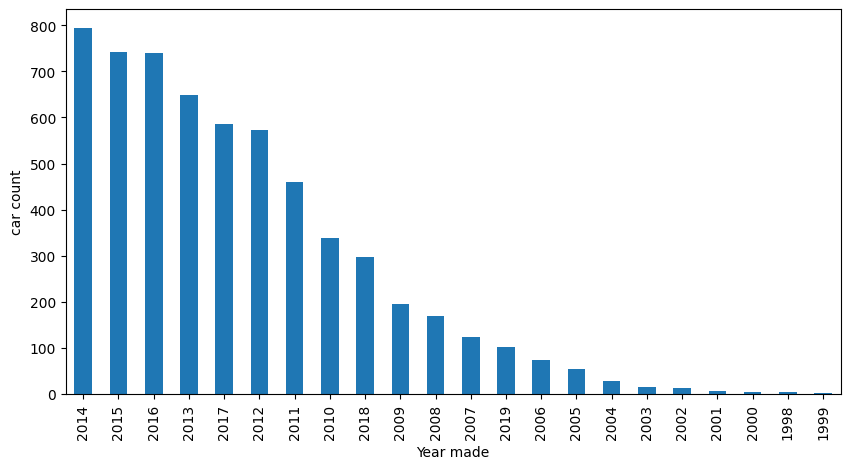

In [13]:
df["Year"].value_counts().plot(kind="bar", figsize=(10,5))
plt.xlabel("Year made")
plt.ylabel("car count")
plt.show()

Text(0, 0.5, 'Price(in lakhs)')

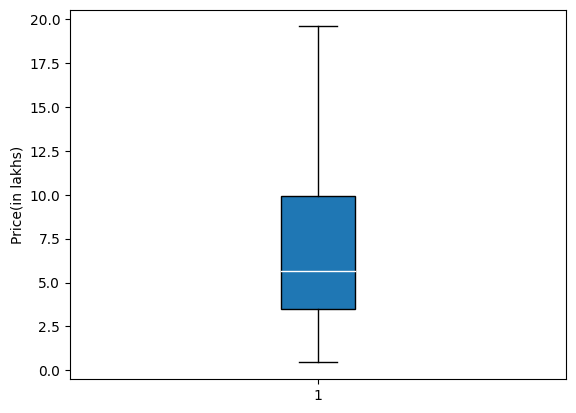

In [14]:
plt.boxplot(df["Price"], showfliers=False, medianprops={"color":"white"}, patch_artist=True )
plt.ylabel("Price(in lakhs)")

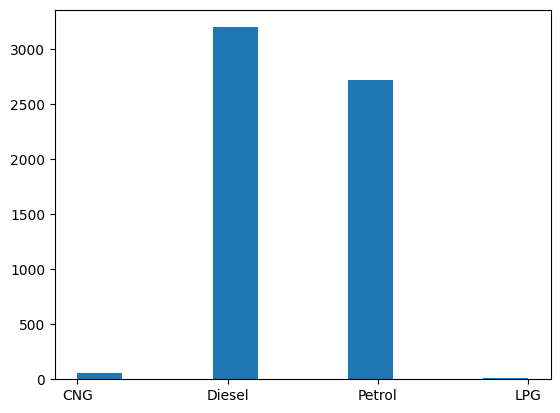

In [15]:
plt.hist(df["Fuel_Type"]);

Text(0.5, 0, 'car_count')

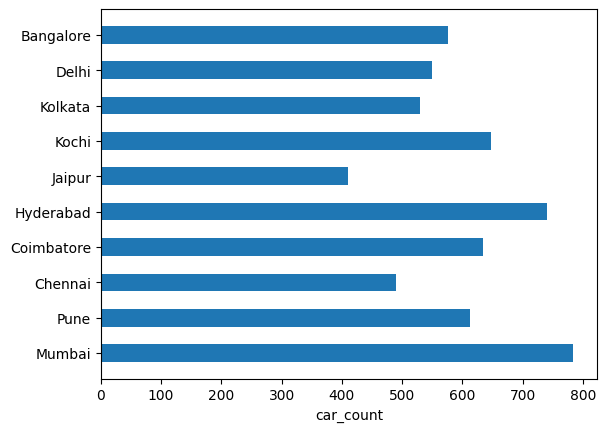

In [16]:
plt.hist(df["Location"],rwidth=0.5, align="left",orientation="horizontal")
plt.xlabel("car_count")

Text(0, 0.5, 'Mileage Km/L')

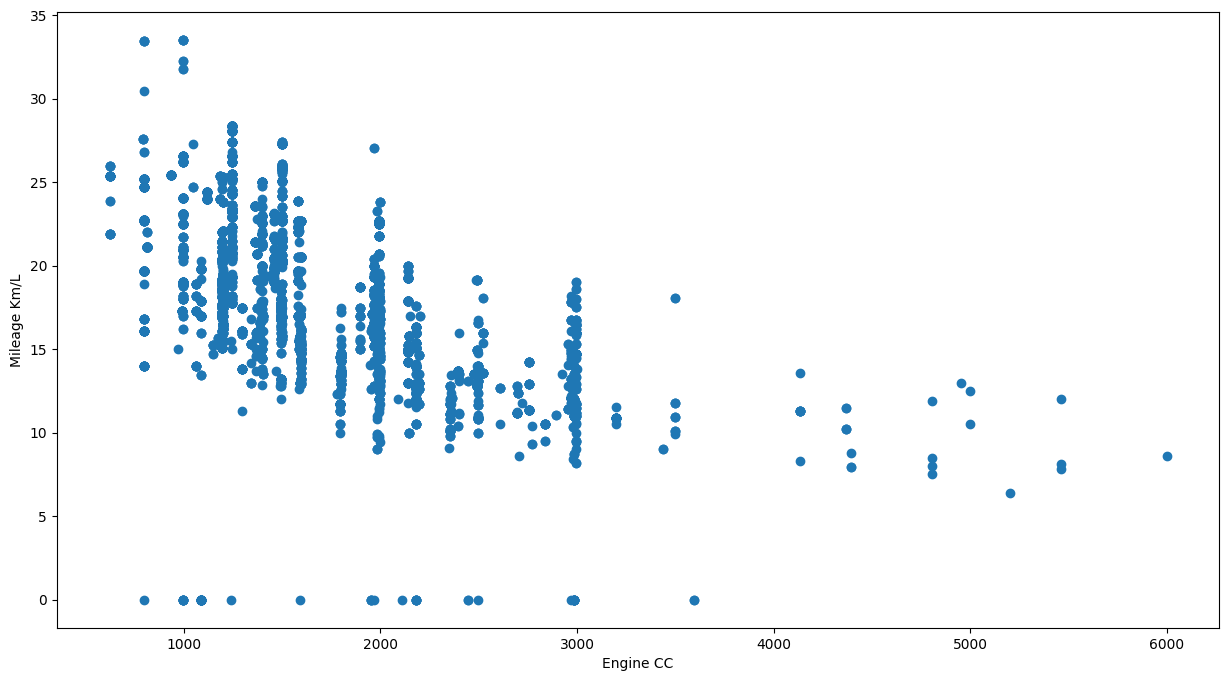

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df["Engine CC"], df["Mileage Km/L"])
ax.set_xlabel("Engine CC")
ax.set_ylabel("Mileage Km/L")

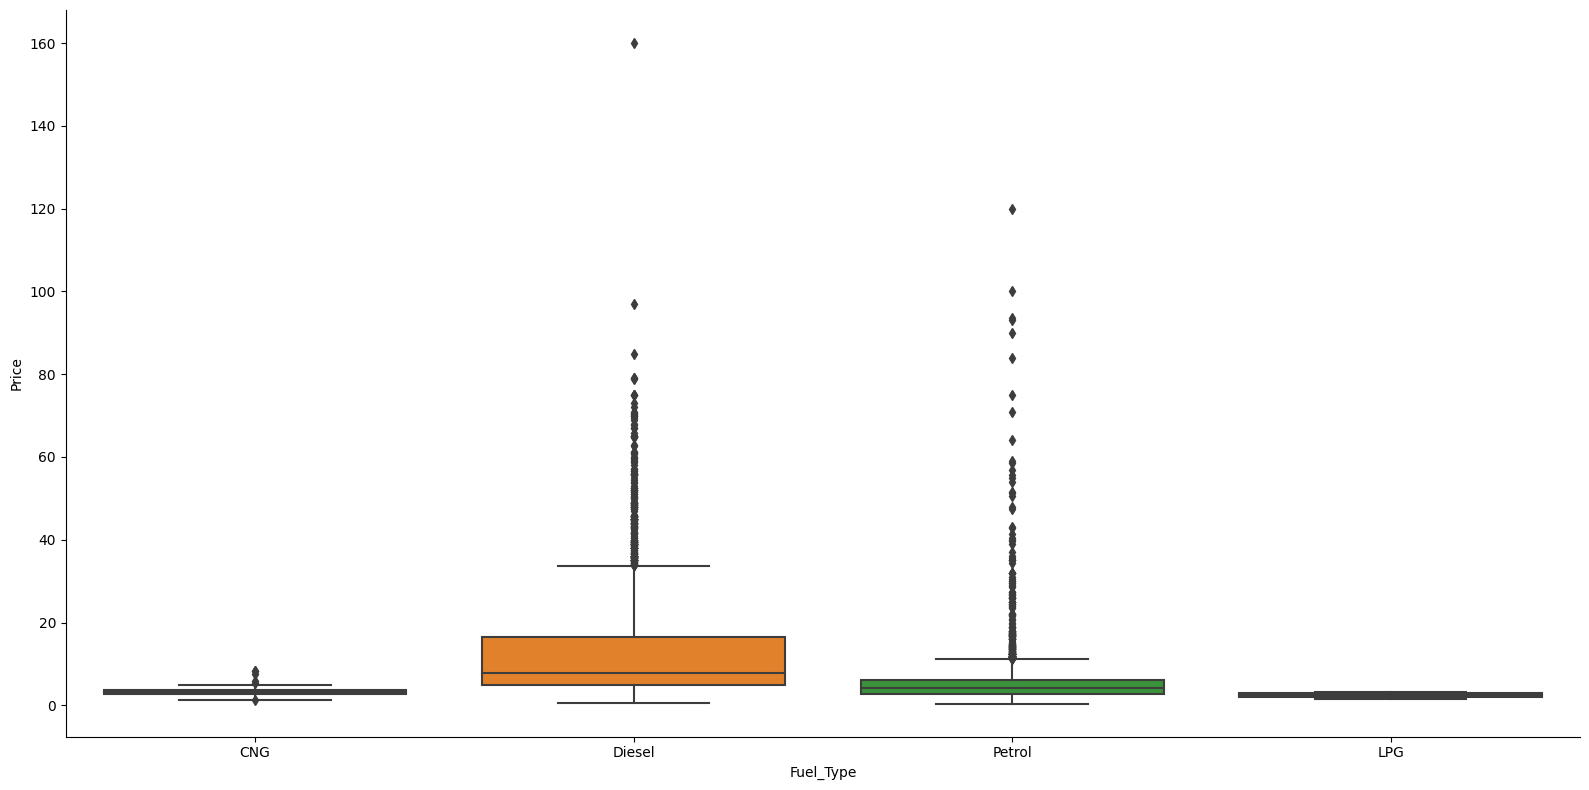

In [18]:
sns.catplot(data=df, y="Price", x="Fuel_Type", kind="box", orient="v",aspect=2, height=8);

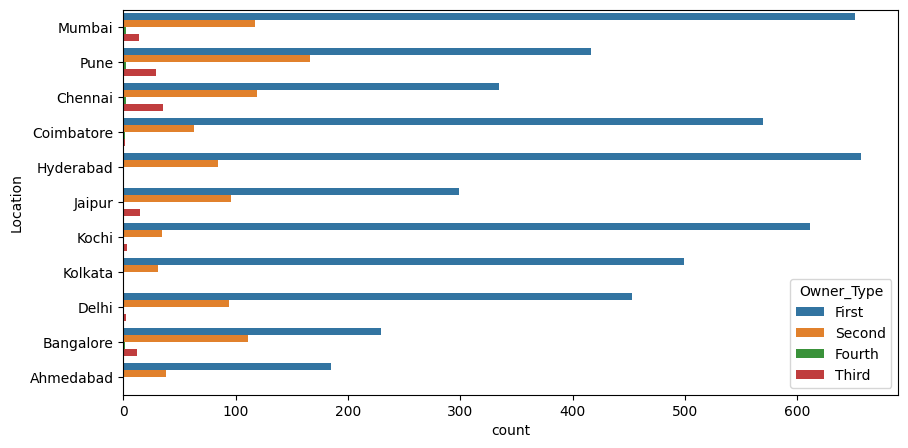

In [19]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(data=df, y="Location", hue="Owner_Type", orient="h",  )

In [20]:
df.head()

,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


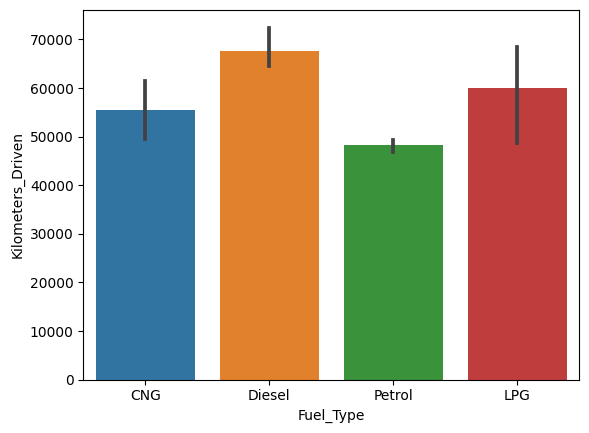

In [21]:
sns.barplot(data=df, x="Fuel_Type", y="Kilometers_Driven");

<Axes: xlabel='Location', ylabel='count'>

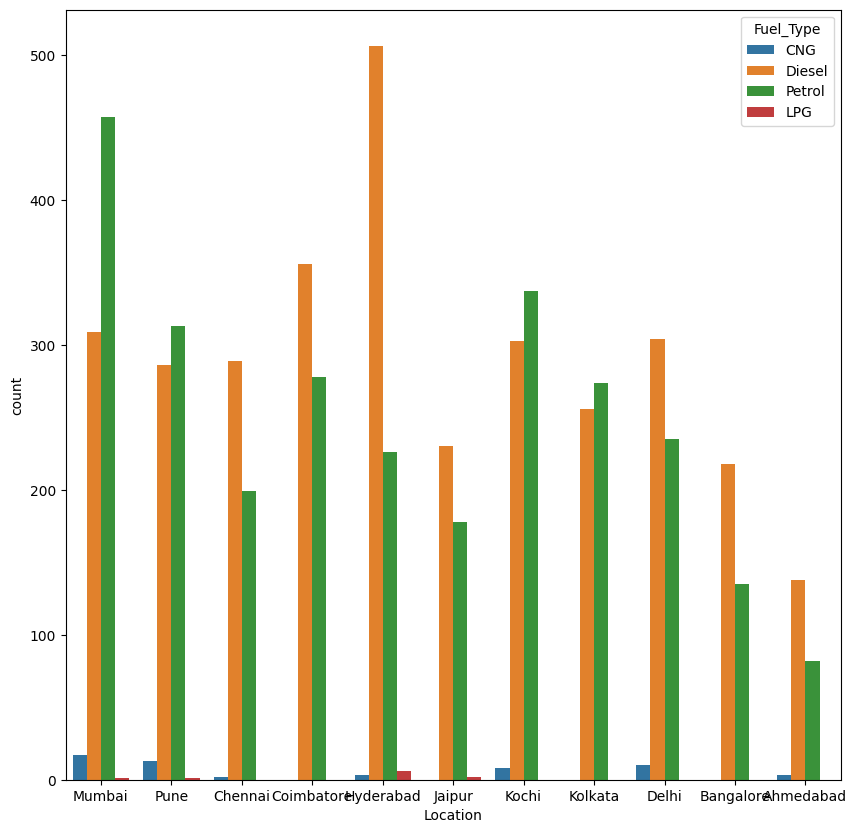

In [22]:
fig, ax=plt.subplots(figsize=(10,10))
sns.countplot(data=df, x="Location", hue="Fuel_Type")

In [23]:
#Preprocessing and ml model libs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Manufacturer       5975 non-null   object 
 2   Location           5975 non-null   object 
 3   Year               5975 non-null   int64  
 4   Kilometers_Driven  5975 non-null   int64  
 5   Fuel_Type          5975 non-null   object 
 6   Transmission       5975 non-null   object 
 7   Owner_Type         5975 non-null   object 
 8   Engine CC          5975 non-null   int64  
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   int64  
 11  Mileage Km/L       5975 non-null   float64
 12  Price              5975 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 607.0+ KB


In [25]:
df_temp = df.copy()

In [26]:
df_temp = df_temp.drop("Name", axis=1)

In [27]:
df_temp.head()

,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


#### PreProcessing

In [28]:
dummies = pd.get_dummies(df_temp[["Manufacturer", "Location", "Fuel_Type", "Transmission", "Owner_Type"]])# passing list of collumns
dummies

,Manufacturer_Ambassador,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Force,Manufacturer_Ford,Manufacturer_Honda,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
5971,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
5972,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [29]:
temp2 = df_temp.drop(["Manufacturer", "Location", "Fuel_Type", "Transmission", "Owner_Type"], axis=1)

In [30]:
temp2

,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price
0,2010,72000,998,58.16,5,26.60,1.75
1,2015,41000,1582,126.20,5,19.67,12.50
2,2011,46000,1199,88.70,5,18.20,4.50
3,2012,87000,1248,88.76,7,20.77,6.00
4,2013,40670,1968,140.80,5,15.20,17.74
...,...,...,...,...,...,...,...
5970,2014,27365,1248,74.00,5,28.40,4.75
5971,2015,100000,1120,71.00,5,24.40,4.00
5972,2012,55000,2498,112.00,8,14.00,2.90
5973,2013,46000,998,67.10,5,18.90,2.65


In [31]:
temp3 = pd.concat([temp2, dummies], axis=1)
temp3

,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price,Manufacturer_Ambassador,Manufacturer_Audi,Manufacturer_BMW,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth,Owner_Type_Second,Owner_Type_Third
0,2010,72000,998,58.16,5,26.60,1.75,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,41000,1582,126.20,5,19.67,12.50,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,46000,1199,88.70,5,18.20,4.50,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,1248,88.76,7,20.77,6.00,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,1968,140.80,5,15.20,17.74,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,2014,27365,1248,74.00,5,28.40,4.75,0,0,0,...,0,1,0,0,0,1,1,0,0,0
5971,2015,100000,1120,71.00,5,24.40,4.00,0,0,0,...,0,1,0,0,0,1,1,0,0,0
5972,2012,55000,2498,112.00,8,14.00,2.90,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5973,2013,46000,998,67.10,5,18.90,2.65,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [32]:
scaler = MinMaxScaler()
df_std = scaler.fit_transform(temp3)

In [33]:
df_std_2 = pd.DataFrame(data = df_std,columns = temp3.columns)
df_std_2

,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price,Manufacturer_Ambassador,Manufacturer_Audi,Manufacturer_BMW,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth,Owner_Type_Second,Owner_Type_Third
0,0.571429,0.011051,0.069594,0.045569,0.5,0.793083,0.008210,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.809524,0.006282,0.178266,0.174971,0.5,0.586464,0.075583,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.619048,0.007051,0.106997,0.103652,0.5,0.542636,0.025445,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.666667,0.013359,0.116115,0.103766,0.7,0.619261,0.034846,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.714286,0.006231,0.250093,0.202739,0.5,0.453190,0.108423,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,0.761905,0.004184,0.116115,0.075694,0.5,0.846750,0.027012,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5971,0.809524,0.015359,0.092296,0.069989,0.5,0.727490,0.022311,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5972,0.666667,0.008435,0.348716,0.147965,0.8,0.417412,0.015417,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5973,0.714286,0.007051,0.069594,0.062571,0.5,0.563506,0.013851,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


### Clustering using Kmeans

In [34]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(df_std)
    wcss.append(kmeans_pca.inertia_)

C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

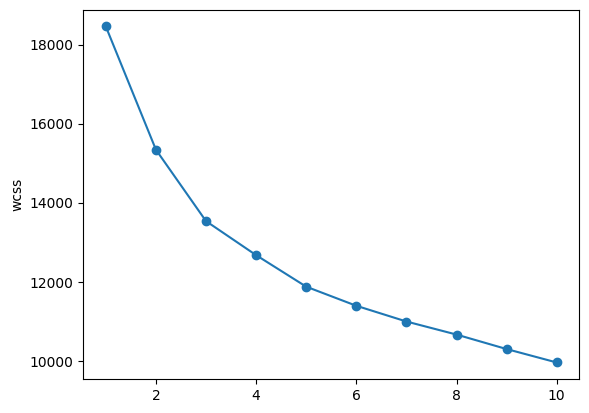

In [35]:
plt.plot(range(1,11), wcss, marker='o')
plt.ylabel("wcss");

In [36]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(df_std)

C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [37]:
df_std_3 = df_std_2.copy()
df_std_3["cluster"] = kmeans.labels_

In [38]:
df_std_3

,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price,Manufacturer_Ambassador,Manufacturer_Audi,Manufacturer_BMW,...,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth,Owner_Type_Second,Owner_Type_Third,cluster
0,0.571429,0.011051,0.069594,0.045569,0.5,0.793083,0.008210,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,0.809524,0.006282,0.178266,0.174971,0.5,0.586464,0.075583,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
2,0.619048,0.007051,0.106997,0.103652,0.5,0.542636,0.025445,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3,0.666667,0.013359,0.116115,0.103766,0.7,0.619261,0.034846,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
4,0.714286,0.006231,0.250093,0.202739,0.5,0.453190,0.108423,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,0.761905,0.004184,0.116115,0.075694,0.5,0.846750,0.027012,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
5971,0.809524,0.015359,0.092296,0.069989,0.5,0.727490,0.022311,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
5972,0.666667,0.008435,0.348716,0.147965,0.8,0.417412,0.015417,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2
5973,0.714286,0.007051,0.069594,0.062571,0.5,0.563506,0.013851,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0


In [39]:
df_segm_analysis = df_std_3.groupby(['cluster']).mean()
df_segm_analysis.T

cluster,0,1,2,3
Year,0.705470,0.765974,0.741746,0.738291
Kilometers_Driven,0.007578,0.009316,0.010936,0.006817
Engine CC,0.113486,0.310249,0.188006,0.208992
Power,0.094435,0.283065,0.120892,0.198877
Seats,0.504201,0.533818,0.560143,0.490148
Mileage Km/L,0.541667,0.468589,0.601754,0.469946
Price,0.022932,0.151722,0.038798,0.067796
Manufacturer_Ambassador,0.000000,0.000000,0.000476,0.000000
Manufacturer_Audi,0.000000,0.197273,0.000000,0.031199
Manufacturer_BMW,0.000000,0.212727,0.000000,0.045977


<Axes: xlabel='Engine CC', ylabel='Price'>

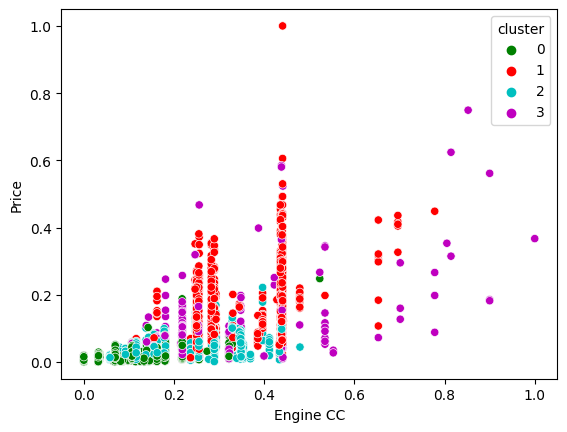

In [40]:
sns.scatterplot(df_std_3, x = "Engine CC", y="Price", hue="cluster",  palette = ['g', 'r', 'c', 'm'])

<Axes: xlabel='Power', ylabel='Price'>

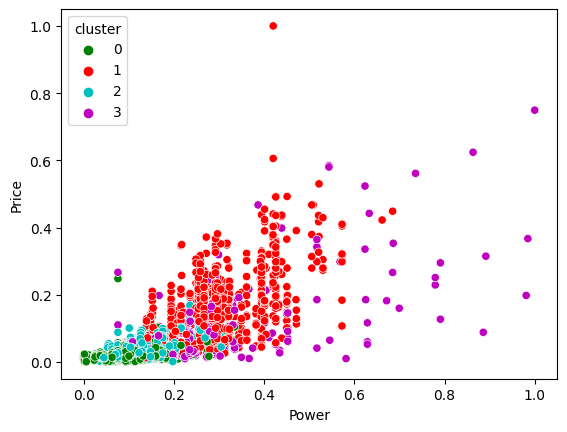

In [41]:
sns.scatterplot(df_std_3,x ="Power", y="Price", hue="cluster", palette = ['g', 'r', 'c', 'm'])

### Reducing features by pca and redoing the clustering

In [42]:
pca = PCA()
pca.fit(df_std_2) 

PCA()

In [43]:
pca.explained_variance_ratio_

array([1.84741475e-01, 1.31989633e-01, 9.20168872e-02, 6.24467516e-02,
       4.41255348e-02, 3.90933991e-02, 3.84362252e-02, 3.45975466e-02,
       3.24582096e-02, 3.12253940e-02, 2.92950795e-02, 2.73302708e-02,
       2.47650220e-02, 2.24643048e-02, 2.02203522e-02, 1.93543793e-02,
       1.66744427e-02, 1.61304873e-02, 1.52739384e-02, 1.34318734e-02,
       1.26261883e-02, 1.17885229e-02, 9.84896927e-03, 9.56625799e-03,
       8.77770322e-03, 7.95198886e-03, 6.63668522e-03, 5.43836400e-03,
       5.11586548e-03, 4.47677356e-03, 4.09922341e-03, 2.70029370e-03,
       2.24216142e-03, 1.64727985e-03, 1.55863372e-03, 1.38818147e-03,
       1.32070416e-03, 1.14617070e-03, 9.49181160e-04, 8.16142284e-04,
       7.91341865e-04, 6.96208506e-04, 6.33947767e-04, 5.65529563e-04,
       3.29426353e-04, 2.06577353e-04, 1.68445885e-04, 1.11391916e-04,
       6.18442361e-05, 5.96631024e-05, 5.38652385e-05, 5.32359828e-05,
       5.25753017e-05, 4.94499203e-05, 3.64338317e-32, 3.48905732e-33,
      

Text(0, 0.5, 'Cumulative Explained Variance')

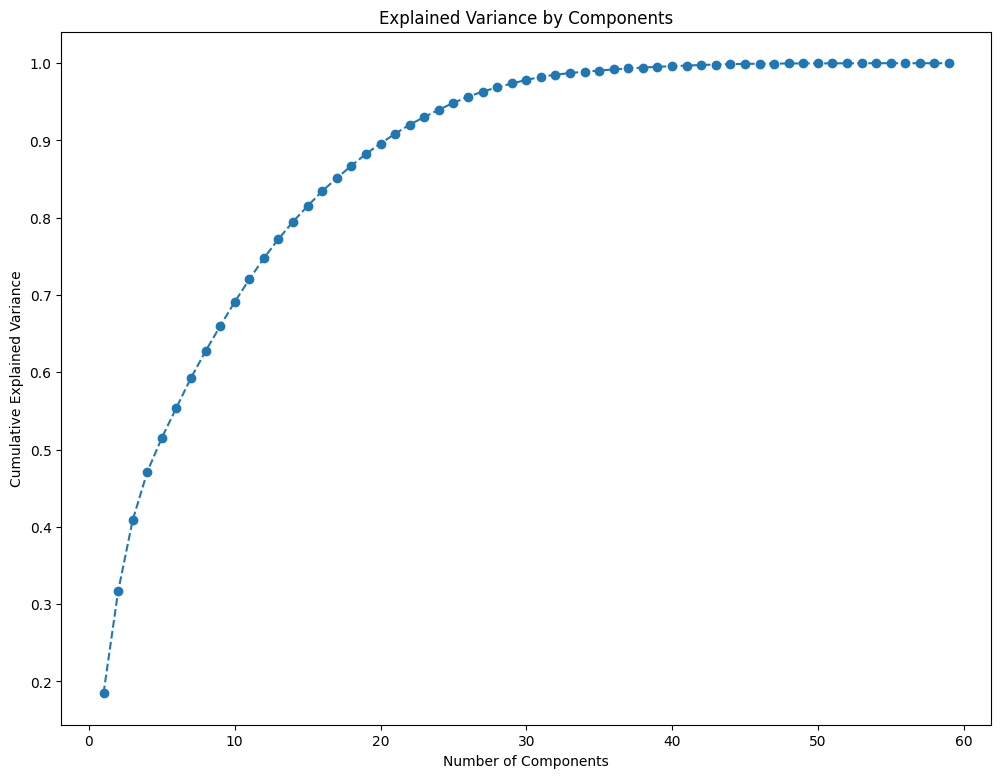

In [44]:
plt.figure(figsize = (12,9))
plt.plot(range(1,60), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [45]:
pca = PCA(n_components = 5)
pca.fit(df_std_2)
pca.components_

array([[ 2.94466467e-02,  1.39942345e-03,  9.40746419e-02,
         7.93870350e-02,  2.50207012e-02, -2.15156177e-02,
         5.36324104e-02,  9.19284197e-05,  7.67812315e-02,
         8.29251299e-02,  4.55336418e-05, -7.86697994e-03,
        -3.01915919e-03, -1.19814227e-03,  3.22456690e-04,
         9.14939268e-03, -8.29297859e-02, -1.48906078e-01,
         2.35437686e-04,  3.29318524e-04,  1.22318382e-02,
         1.57412903e-03,  3.00761293e-05,  1.92844763e-02,
         3.54379227e-02, -1.42981468e-01,  8.20839687e-02,
         3.83280214e-03,  2.68510540e-03,  2.24539007e-04,
         3.58637943e-03,  2.64733264e-03,  1.26872448e-02,
         2.94134076e-04, -1.39313386e-03,  3.91740075e-02,
        -4.07898657e-03,  6.71934888e-03,  4.68296998e-03,
         2.29620800e-02,  4.36846313e-03,  2.79221269e-02,
         9.29061117e-03,  4.32458819e-02, -1.69541447e-02,
        -1.22262549e-02, -3.36290339e-02, -2.20598237e-02,
        -2.76028759e-02, -6.28615574e-03,  5.68966208e-0

In [79]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_std_2.columns,
              index = ['Component'+ str(i) for i in range(1,6)])
df_pca_comp.T


,Component1,Component2,Component3,Component4,Component5
Year,0.029447,-0.003266,-0.113271,-0.015339,-0.034123
Kilometers_Driven,0.001399,-0.001862,0.002646,0.000045,0.000624
Engine CC,0.094075,0.038615,0.016268,-0.024546,0.063967
Power,0.079387,0.068927,0.003903,-0.017869,0.031119
Seats,0.025021,-0.032059,0.006940,-0.003940,0.037612
Mileage Km/L,-0.021516,-0.089380,-0.038131,0.050900,-0.071670
Price,0.053632,0.037030,-0.013527,-0.002019,-0.006671
Manufacturer_Ambassador,0.000092,-0.000262,0.000425,-0.000048,0.000215
Manufacturer_Audi,0.076781,0.059115,0.001238,0.006948,-0.029191
Manufacturer_BMW,0.082925,0.069310,0.008566,0.014343,-0.013305


In [47]:
col = df_pca_comp.columns
col

Index(['Year', 'Kilometers_Driven', 'Engine CC', 'Power', 'Seats',
       'Mileage Km/L', 'Price', 'Manufacturer_Ambassador', 'Manufacturer_Audi',
       'Manufacturer_BMW', 'Manufacturer_Bentley', 'Manufacturer_Chevrolet',
       'Manufacturer_Datsun', 'Manufacturer_Fiat', 'Manufacturer_Force',
       'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Hyundai',
       'Manufacturer_ISUZU', 'Manufacturer_Isuzu', 'Manufacturer_Jaguar',
       'Manufacturer_Jeep', 'Manufacturer_Lamborghini', 'Manufacturer_Land',
       'Manufacturer_Mahindra', 'Manufacturer_Maruti',
       'Manufacturer_MercedesBenz', 'Manufacturer_Mini',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Porsche', 'Manufacturer_Renault', 'Manufacturer_Skoda',
       'Manufacturer_Smart', 'Manufacturer_Tata', 'Manufacturer_Toyota',
       'Manufacturer_Volkswagen', 'Manufacturer_Volvo', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'L

<Axes: >

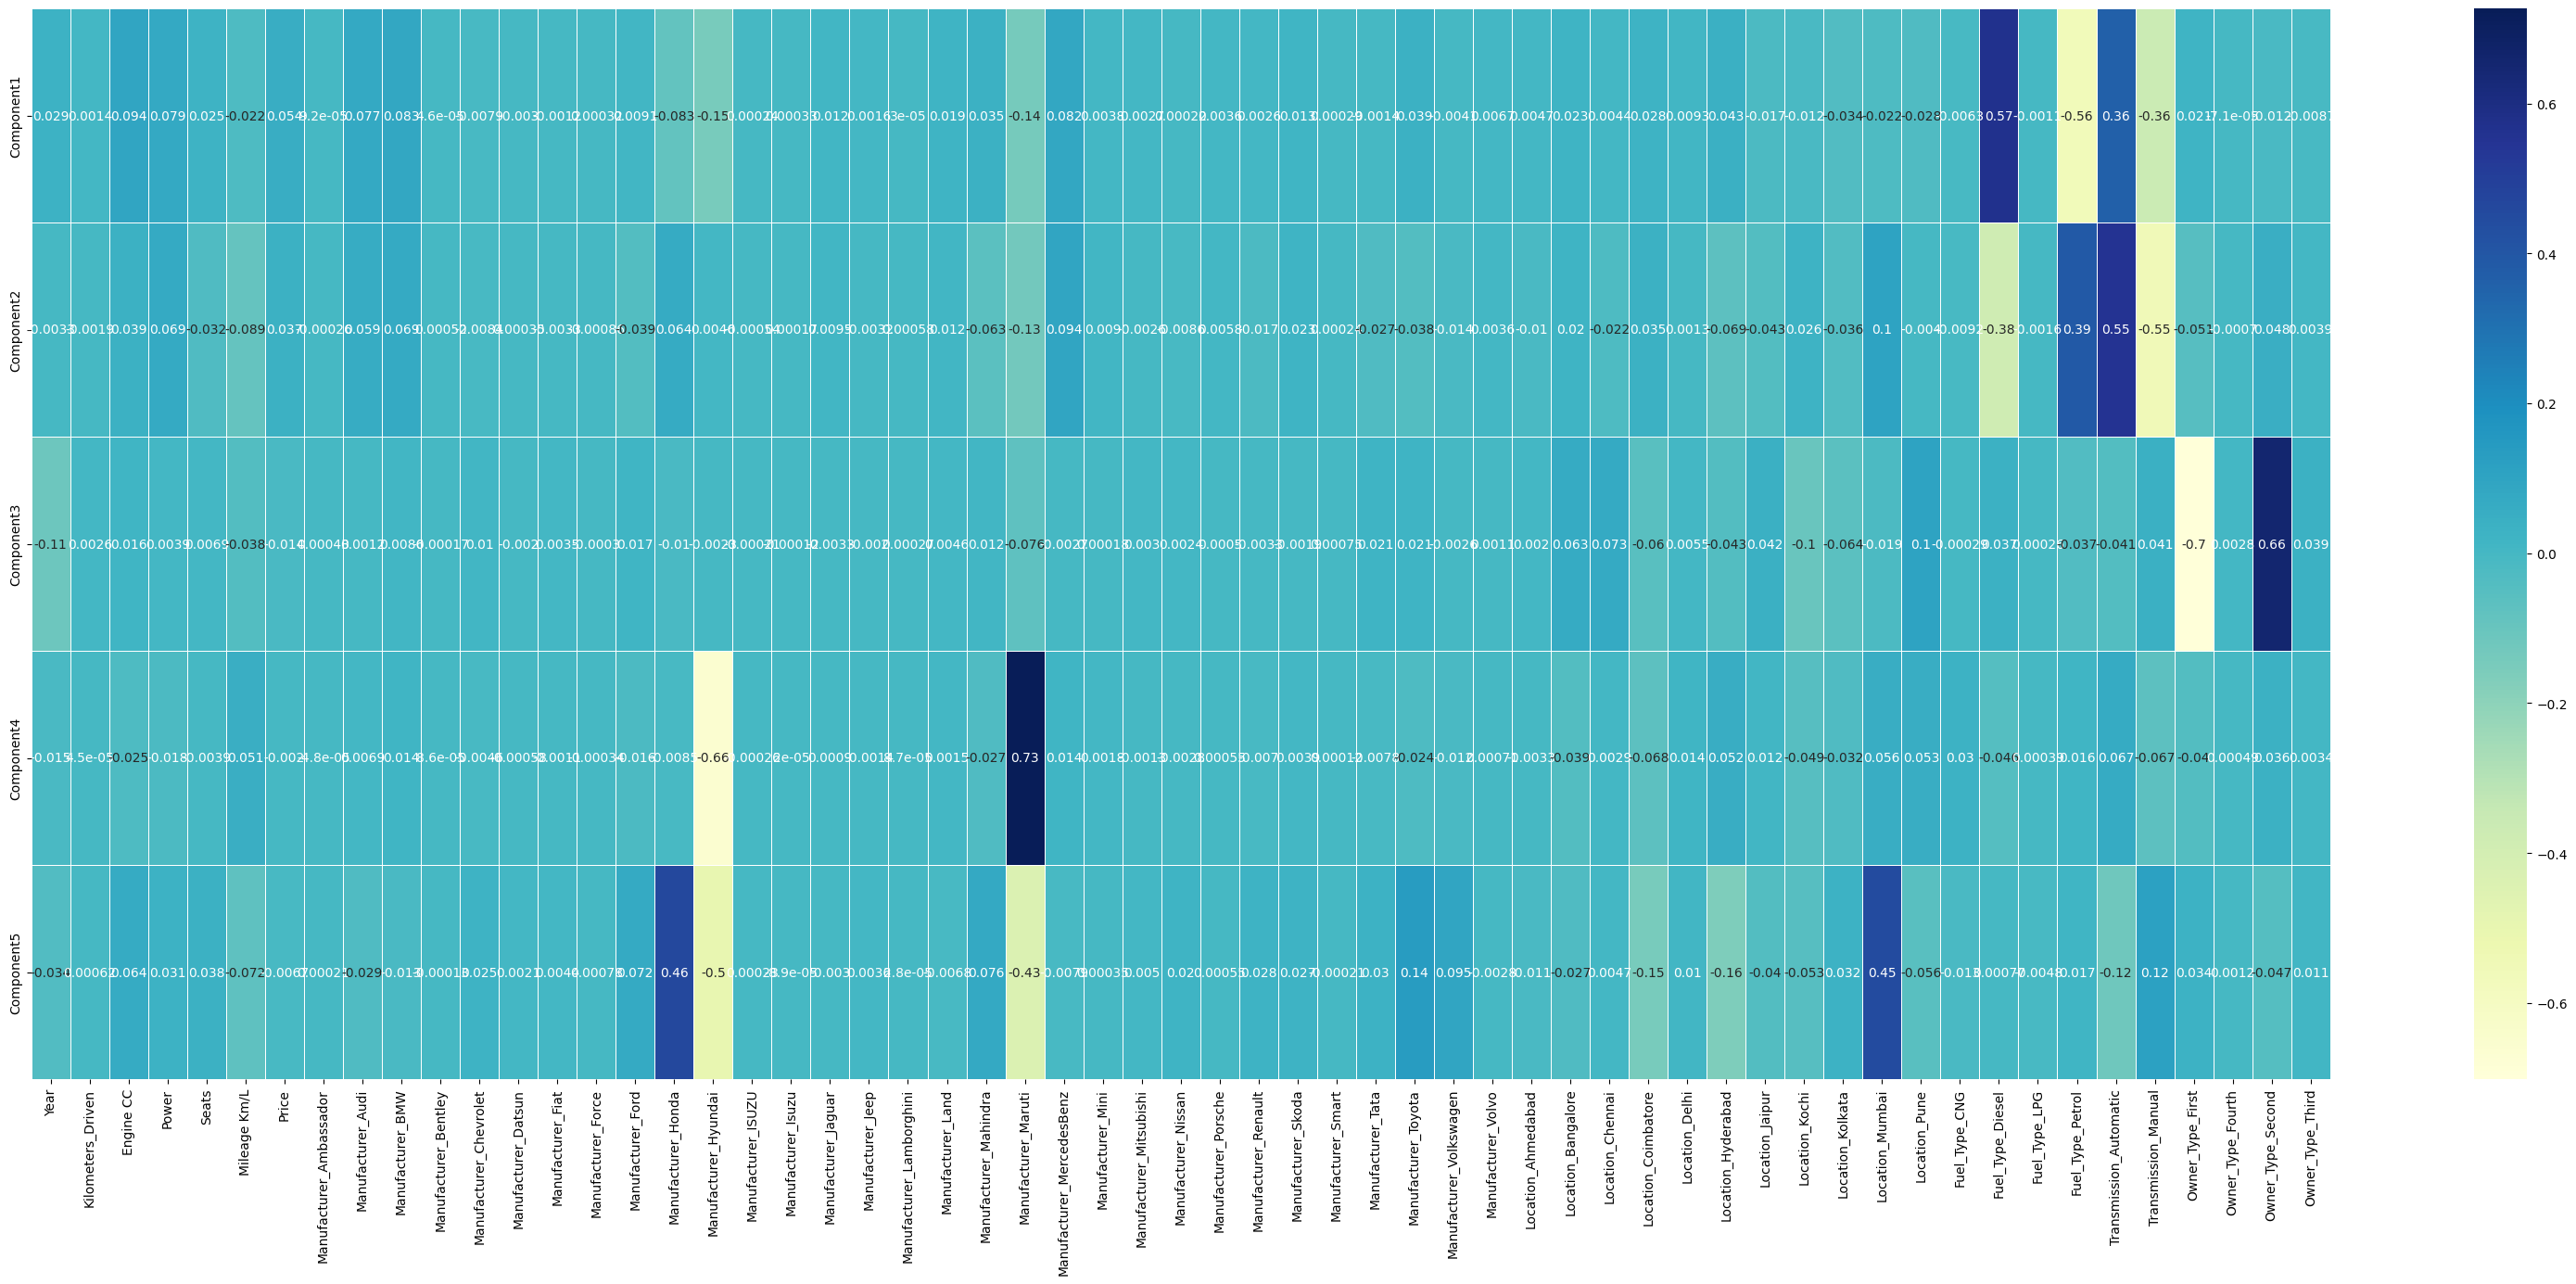

In [49]:
plt.figure(figsize=(40,15))
sns.heatmap(df_pca_comp, annot=True,linewidths=0.5, cmap="YlGnBu")

In [50]:
df_std_2.head()

,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price,Manufacturer_Ambassador,Manufacturer_Audi,Manufacturer_BMW,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth,Owner_Type_Second,Owner_Type_Third
0,0.571429,0.011051,0.069594,0.045569,0.5,0.793083,0.008210,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.809524,0.006282,0.178266,0.174971,0.5,0.586464,0.075583,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.619048,0.007051,0.106997,0.103652,0.5,0.542636,0.025445,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.666667,0.013359,0.116115,0.103766,0.7,0.619261,0.034846,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.714286,0.006231,0.250093,0.202739,0.5,0.453190,0.108423,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [51]:
df_pca = pca.transform(df_std_2)

In [52]:
df_pca_comp_2 = pd.DataFrame(df_pca, columns=['PC'+str(i) for i in range(1,6)])
df_pca_comp_2

,PC1,PC2,PC3,PC4,PC5
0,-0.405412,-0.366932,-0.279457,0.774405,0.149325
1,0.193932,-0.674625,-0.063232,-0.707315,-0.388359
2,-0.858421,0.133284,-0.153794,-0.043540,0.651711
3,0.218245,-0.845856,-0.152284,0.632085,-0.261838
4,1.175221,0.642559,1.072269,0.035826,-0.308507
...,...,...,...,...,...
5970,0.213412,-0.839190,-0.240614,0.655070,-0.284483
5971,0.182280,-0.738895,-0.131347,-0.737168,-0.391290
5972,0.372913,-0.674538,1.278907,-0.054003,0.158995
5973,-0.961516,-0.083694,-0.368218,0.658644,-0.228018


In [53]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmean_pca = kmeans_pca.fit(df_pca)

C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
df_pca_comp_2["cluster"] = kmeans_pca.labels_

In [55]:
df_pca_comp_2

,PC1,PC2,PC3,PC4,PC5,cluster
0,-0.405412,-0.366932,-0.279457,0.774405,0.149325,1
1,0.193932,-0.674625,-0.063232,-0.707315,-0.388359,2
2,-0.858421,0.133284,-0.153794,-0.043540,0.651711,1
3,0.218245,-0.845856,-0.152284,0.632085,-0.261838,2
4,1.175221,0.642559,1.072269,0.035826,-0.308507,0
...,...,...,...,...,...,...
5970,0.213412,-0.839190,-0.240614,0.655070,-0.284483,2
5971,0.182280,-0.738895,-0.131347,-0.737168,-0.391290,2
5972,0.372913,-0.674538,1.278907,-0.054003,0.158995,2
5973,-0.961516,-0.083694,-0.368218,0.658644,-0.228018,1


In [56]:
df_pca_comp_analyse = df_pca_comp_2.groupby(df_pca_comp_2["cluster"]).mean()
df_pca_comp_analyse

,PC1,PC2,PC3,PC4,PC5
cluster,,,,,
0,1.166608,0.524097,-0.008897,0.010966,-0.083005
1,-0.871578,0.072351,-0.000797,-0.006365,0.001838
2,0.312066,-0.716432,0.034120,-0.030006,0.043265
3,-0.083364,1.266484,-0.098750,0.106302,-0.005800


In [72]:
df_pca_comp_analyse.index

Int64Index([0, 1, 2, 3], dtype='int64', name='cluster')

In [73]:
temp = df_pca_comp_analyse.copy()
temp["cluster"]=[0, 1, 2, 3]

In [78]:
import plotly.express as px
df = temp
fig = px.parallel_coordinates(df,color="cluster",
                              dimensions=['PC1', 'PC2', 'PC3', 'PC4','PC5'],
                              )
fig.show()

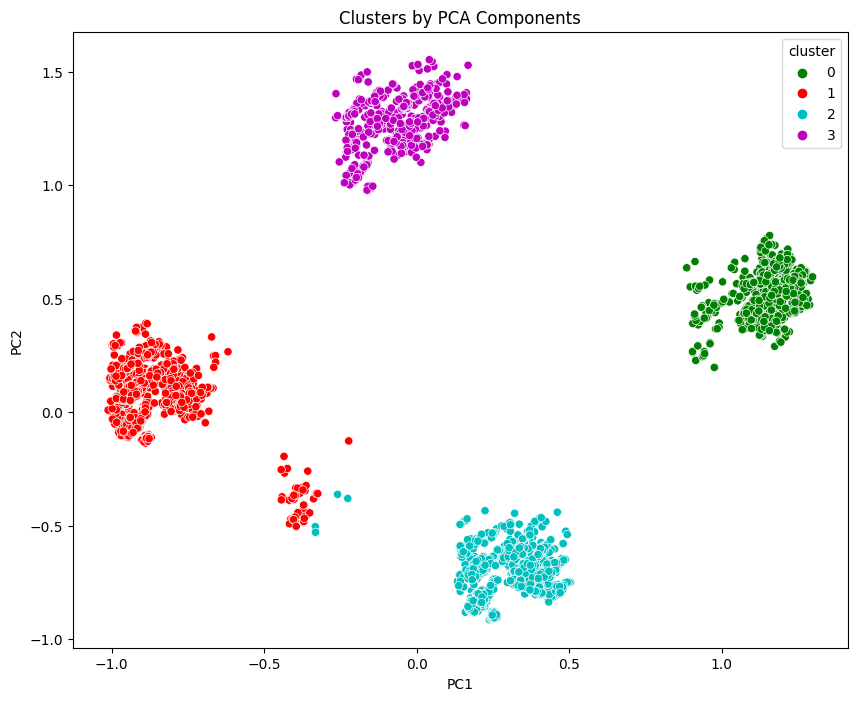

In [58]:
plt.figure(figsize = (10, 8))
sns.scatterplot(df_pca_comp_2, x = "PC1",y = "PC2", hue = "cluster" , palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

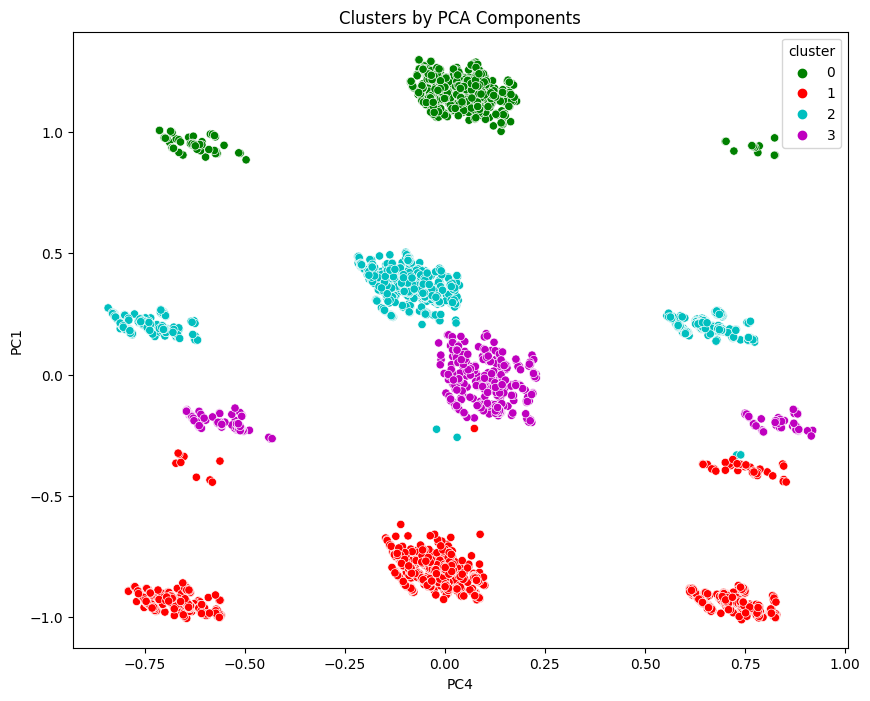

In [59]:
plt.figure(figsize = (10, 8))
sns.scatterplot(df_pca_comp_2, x = "PC4",y = "PC1", hue = "cluster" , palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()